# **1. Statistics of RE Dataset V1 & V2**


In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


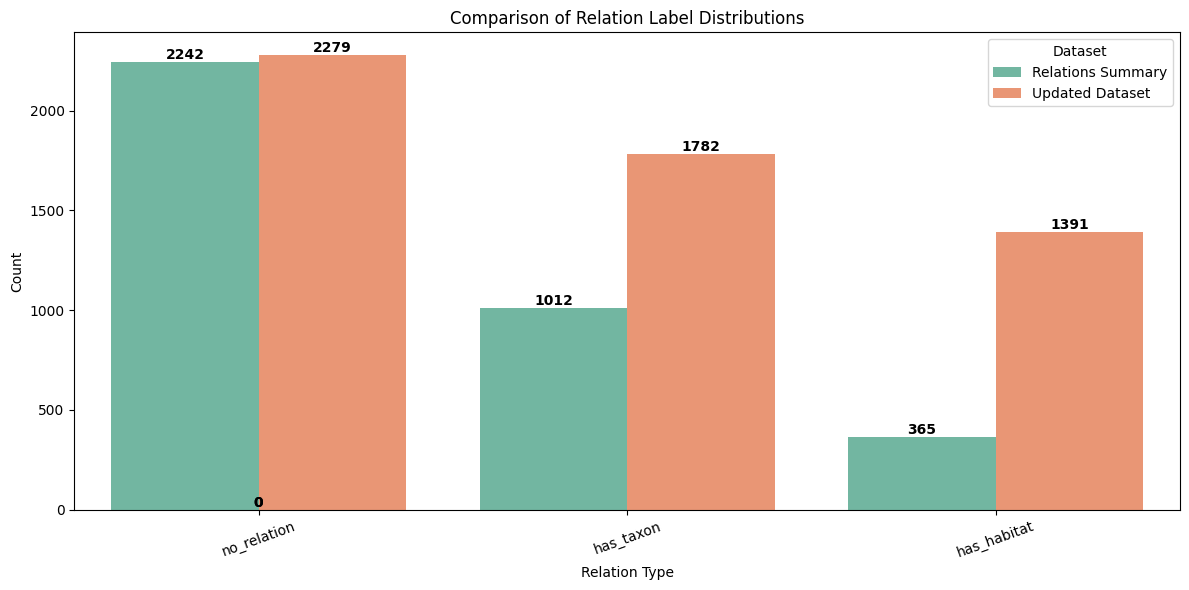

### Relation Counts - Relations Summary ###
Relation Type  Count           Dataset
  no_relation   2242 Relations Summary
    has_taxon   1012 Relations Summary
  has_habitat    365 Relations Summary


### Previous Dataset - Current Dataset ###
Relation Type  Count         Dataset
  no_relation   2279 Updated Dataset
    has_taxon   1782 Updated Dataset
  has_habitat   1391 Updated Dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
file_path1 = "/content/drive/MyDrive/2425_2NDSEM/CS199/manuscript/MDATA/INT_ALL_relations_summary.xlsx"
file_path2 = "/content/drive/MyDrive/2425_2NDSEM/CS199/manuscript/MDATA/COMPLETE_ALL_relations_summary.xlsx"

df1 = pd.read_excel(file_path1, sheet_name="Sheet1")
df2 = pd.read_excel(file_path2, sheet_name="Sheet1")

# Get counts for both datasets
def get_counts(df, name):
    counts = df["relation"].value_counts().reset_index()
    counts.columns = ["Relation Type", "Count"]
    counts["Dataset"] = name  # Add dataset identifier
    return counts

counts1 = get_counts(df1, "Relations Summary")
counts2 = get_counts(df2, "Updated Dataset")

# Combine the counts
combined_counts = pd.concat([counts1, counts2])

# Create the combined plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=combined_counts, x="Relation Type", y="Count", hue="Dataset",
                 palette="Set2", dodge=True)  # dodge=True for side-by-side bars

# Add count labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Relation Type")
plt.ylabel("Count")
plt.title("Comparison of Relation Label Distributions")
plt.xticks(rotation=20)
plt.legend(title='Dataset')
plt.tight_layout()

plt.show()

# Print tables for both datasets
print("### Relation Counts - Relations Summary ###")
print(counts1.to_string(index=False))
print("\n" + "="*50 + "\n")

print("### Previous Dataset - Current Dataset ###")
print(counts2.to_string(index=False))

<Figure size 1600x800 with 0 Axes>

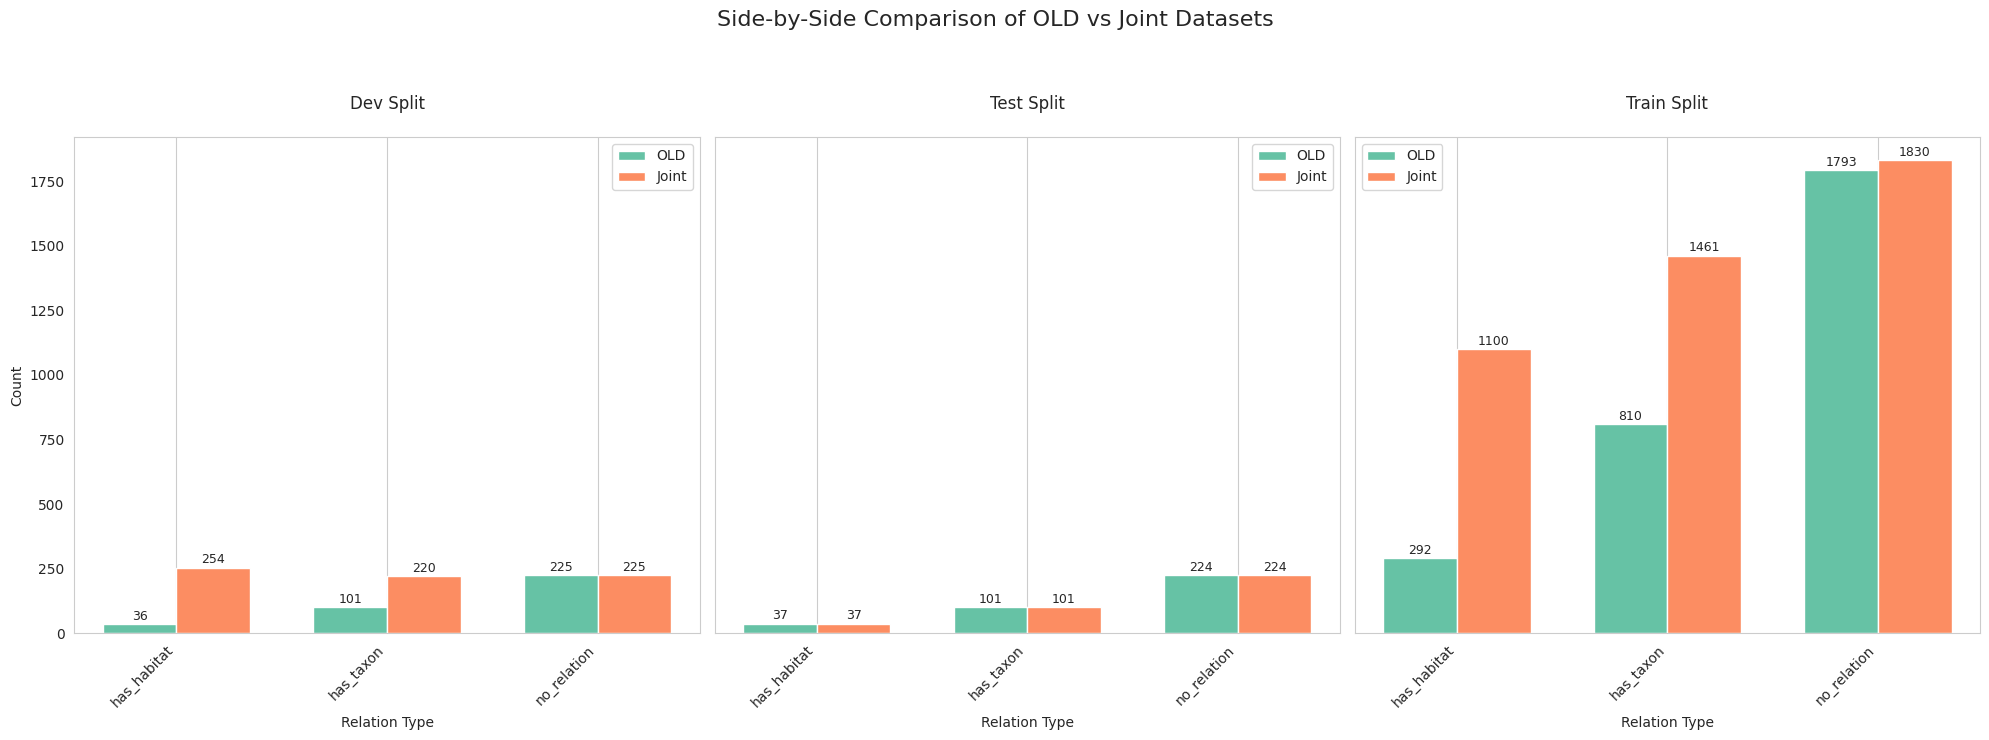

=== Count Comparison Tables ===

Dev Split:
Relation Type   OLD  Joint
  has_habitat  36.0  254.0
    has_taxon 101.0  220.0
  no_relation 225.0  225.0

Test Split:
Relation Type   OLD  Joint
  has_habitat  37.0   37.0
    has_taxon 101.0  101.0
  no_relation 224.0  224.0

Train Split:
Relation Type    OLD  Joint
  has_habitat  292.0 1100.0
    has_taxon  810.0 1461.0
  no_relation 1793.0 1830.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load all datasets
old_files = {
    'Train': '/content/drive/MyDrive/2425_2NDSEM/CS199/manuscript/MDATA/f_train.xlsx',
    'Dev': '/content/drive/MyDrive/2425_2NDSEM/CS199/manuscript/MDATA/f_dev.xlsx',
    'Test': '/content/drive/MyDrive/2425_2NDSEM/CS199/manuscript/MDATA/f_test.xlsx'
}

joint_files = {
    'Train': '/content/drive/MyDrive/2425_2NDSEM/CS199/manuscript/MDATA/g_train.xlsx',
    'Dev': '/content/drive/MyDrive/2425_2NDSEM/CS199/manuscript/MDATA/g_dev.xlsx',
    'Test': '/content/drive/MyDrive/2425_2NDSEM/CS199/manuscript/MDATA/g_test.xlsx'
}

# Prepare data
def prepare_data(files_dict, group_name):
    all_data = []
    for split, path in files_dict.items():
        df = pd.read_excel(path)
        counts = df['relation'].value_counts().reset_index()
        counts.columns = ['Relation Type', 'Count']
        counts['Split'] = split
        counts['Group'] = group_name
        all_data.append(counts)
    return pd.concat(all_data)

old_data = prepare_data(old_files, 'OLD')
joint_data = prepare_data(joint_files, 'Joint')
combined = pd.concat([old_data, joint_data])

# Pivot for comparison
pivot_df = combined.pivot_table(index=['Relation Type', 'Split'],
                              columns='Group',
                              values='Count',
                              fill_value=0).reset_index()

# Create plot
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Get unique relation types and splits
relations = pivot_df['Relation Type'].unique()
splits = pivot_df['Split'].unique()
bar_width = 0.35
index = np.arange(len(relations))

# Create subplots for each split
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
fig.suptitle('Side-by-Side Comparison of OLD vs Joint Datasets', fontsize=16, y=1.05)

# Color palette
palette = sns.color_palette("Set2")

for i, split in enumerate(splits):
    split_data = pivot_df[pivot_df['Split'] == split]

    # Plot side-by-side bars
    pos = index - bar_width/2
    axes[i].bar(pos, split_data['OLD'], bar_width,
               label='OLD', color=palette[0])
    axes[i].bar(pos + bar_width, split_data['Joint'], bar_width,
               label='Joint', color=palette[1])

    # Add value labels
    for j, (old_val, joint_val) in enumerate(zip(split_data['OLD'], split_data['Joint'])):
        if old_val > 0:
            axes[i].text(pos[j], old_val + 5, f'{int(old_val)}',
                        ha='center', va='bottom', fontsize=9)
        if joint_val > 0:
            axes[i].text(pos[j] + bar_width, joint_val + 5, f'{int(joint_val)}',
                        ha='center', va='bottom', fontsize=9)

    axes[i].set_title(f'{split} Split', pad=20)
    axes[i].set_xlabel('Relation Type')
    axes[i].set_xticks(index)
    axes[i].set_xticklabels(relations, rotation=45, ha='right')
    if i == 0:
        axes[i].set_ylabel('Count')
    axes[i].legend()
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

# Print comparison tables
print("=== Count Comparison Tables ===")
for split in splits:
    print(f"\n{split} Split:")
    print(pivot_df[pivot_df['Split'] == split][['Relation Type', 'OLD', 'Joint']]
          .to_string(index=False))